In [1]:
import tensorflow as tf
from tensorflow.keras.utils import get_file, image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [2]:
path = "Gender_mask/gender_dataset_face/"

In [3]:
dataset = image_dataset_from_directory(path,image_size=(224,224),batch_size=16)

Found 2307 files belonging to 2 classes.


In [4]:
dataset.class_names

['man', 'woman']

In [5]:
normalization = tf.keras.layers.Rescaling(1./255)

In [6]:
train_dataset = dataset.map(lambda x,y: (normalization(x),y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
for rasm,label in dataset.take(1):
    for i in range(1):
        rasm = rasm[i].numpy().astype("uint8")

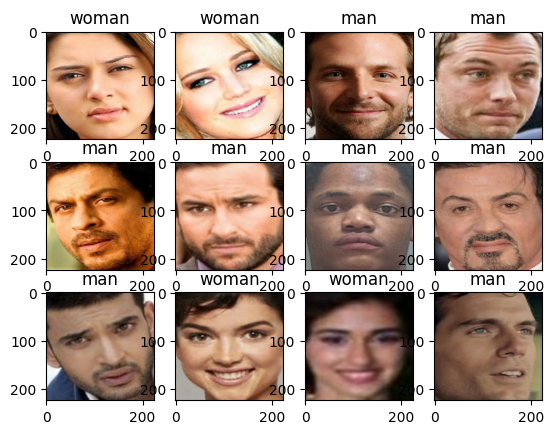

In [8]:
CLASSES = dataset.class_names
for rasm,label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(rasm[i].numpy().astype("uint8"))
        plt.title(CLASSES[label[i]])

In [9]:
vgg16 = VGG16(include_top=False,input_shape=(224,224,3))

In [10]:
for i in vgg16.layers:
    i.trainable = False

In [11]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    rotation_range=0.2,
                                    height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    fill_mode="nearest",
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    )

In [12]:
model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [13]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
model.fit(train_dataset,epochs=3)

Epoch 1/3


In [34]:
model.save("man_woman.h5")